# Urban Mobility Insights: Predictive Analysis of NYC Taxi Demand

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Change to the directory where your dataset is located
os.chdir("/content/drive/My Drive/ML_dataset")


In [ ]:
# Load the dataset
dataset = pd.read_csv("yellow_tripdata_2016-03.csv")

In [ ]:
# Display basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB
None


In [ ]:
# Display the first few rows of the dataset
print(dataset.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1

In [ ]:
# Display the first few rows of the dataset
print("First few rows:")
print(dataset.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(dataset.info())

# Display summary statistics
print("\nSummary Statistics:")
print(dataset.describe())


First few rows:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.7461

In [ ]:
# Check for missing values in each column
missing_values = dataset.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:\n", missing_values)

Missing Values:
 VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [ ]:
# Convert relevant timestamps to datetime objects
dataset['tpep_pickup_datetime'] = pd.to_datetime(dataset['tpep_pickup_datetime'])
dataset['tpep_dropoff_datetime'] = pd.to_datetime(dataset['tpep_dropoff_datetime'])

In [ ]:
# Handle outliers
# You might want to define a function or method to handle outliers based on your dataset characteristics
# For example, if you want to remove trips with abnormal trip distances:
# Assuming normal trip distances should be within a reasonable range, e.g., between 0 and 100 miles
dataset = dataset[(dataset['trip_distance'] > 0) & (dataset['trip_distance'] <= 100)]

In [ ]:
# Reset index after dropping rows
dataset.reset_index(drop=True, inplace=True)

# Display the first few rows of the preprocessed dataset
print(dataset.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1           2016-03-01   2016-03-01 00:07:55                1   
1         1           2016-03-01   2016-03-01 00:11:06                1   
2         2           2016-03-01   2016-03-01 00:31:06                2   
3         2           2016-03-01   2016-03-01 00:00:00                3   
4         2           2016-03-01   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1

# Feature Engineering (Spatial and Temporal Features):

Spatial Features:
    The code defines spatial features based on predefined zones. In this case, it categorizes pickups and dropoffs into 'Manhattan' or 'Other' regions.
    You can customize or define your own regions based on the characteristics of your dataset.

Temporal Features:
    Extracts temporal features such as the hour of the day, day of the week, and month from the pickup timestamps.
    Creates additional features like 'is_weekend' to capture the weekend/weekday patterns.

These spatial and temporal features provide valuable information that can be used for further analysis and modeling in predicting taxi demand. Adjust the code based on the specifics of your dataset and the features you find most relevant.

In [ ]:
import pandas as pd


# Temporal Features
# Extracting temporal features
dataset['pickup_hour'] = pd.to_datetime(dataset['tpep_pickup_datetime']).dt.hour
dataset['pickup_dayofweek'] = pd.to_datetime(dataset['tpep_pickup_datetime']).dt.dayofweek
dataset['pickup_month'] = pd.to_datetime(dataset['tpep_pickup_datetime']).dt.month

# Creating a binary 'is_weekend' feature
dataset['is_weekend'] = (dataset['pickup_dayofweek'] >= 5).astype(int)

# Display the first few rows with the new features
print(dataset[['pickup_hour', 'pickup_dayofweek', 'pickup_month', 'is_weekend']].head())


   pickup_hour  pickup_dayofweek  pickup_month  is_weekend
0            0                 1             3           0
1            0                 1             3           0
2            0                 1             3           0
3            0                 1             3           0
4            0                 1             3           0


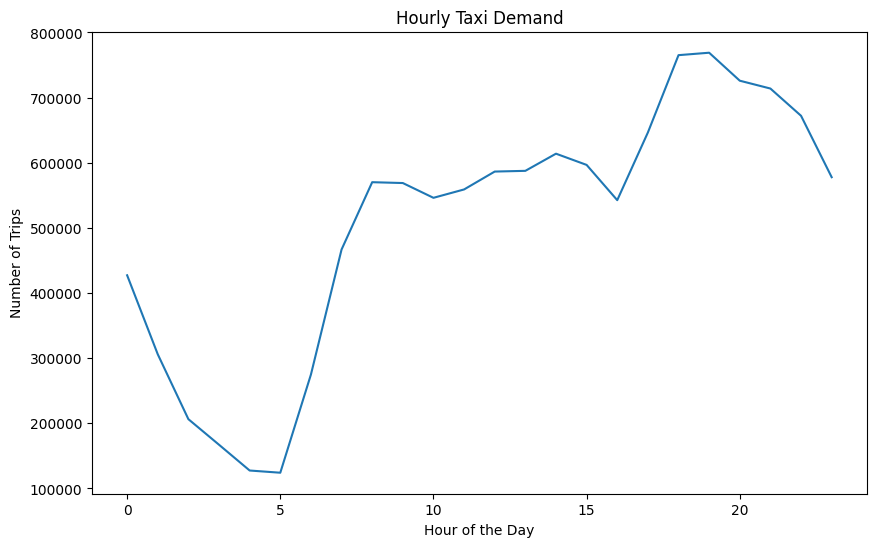

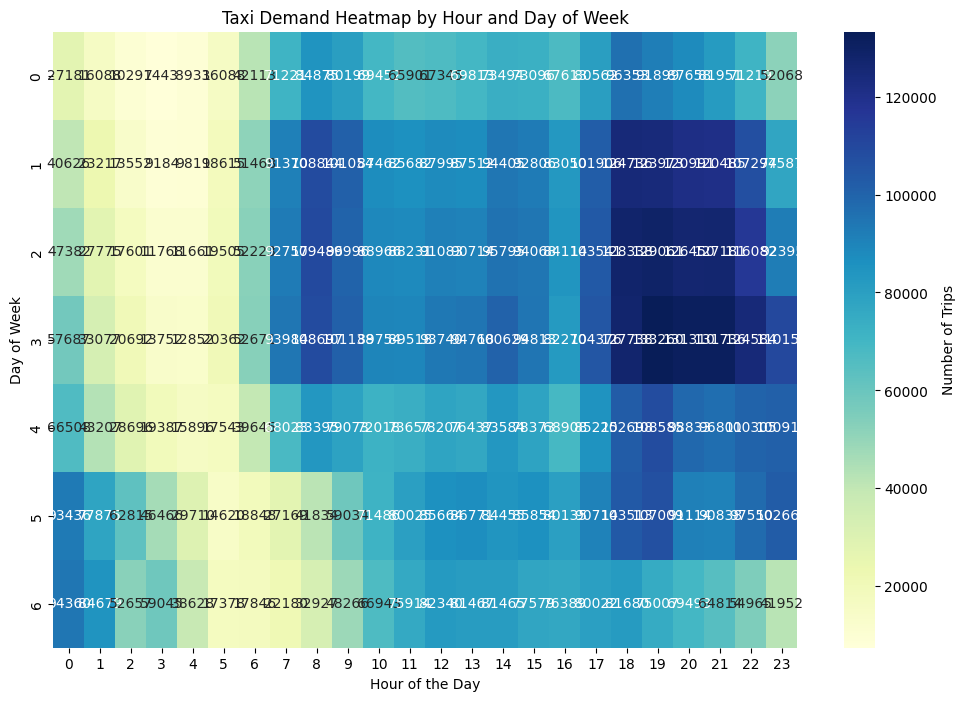

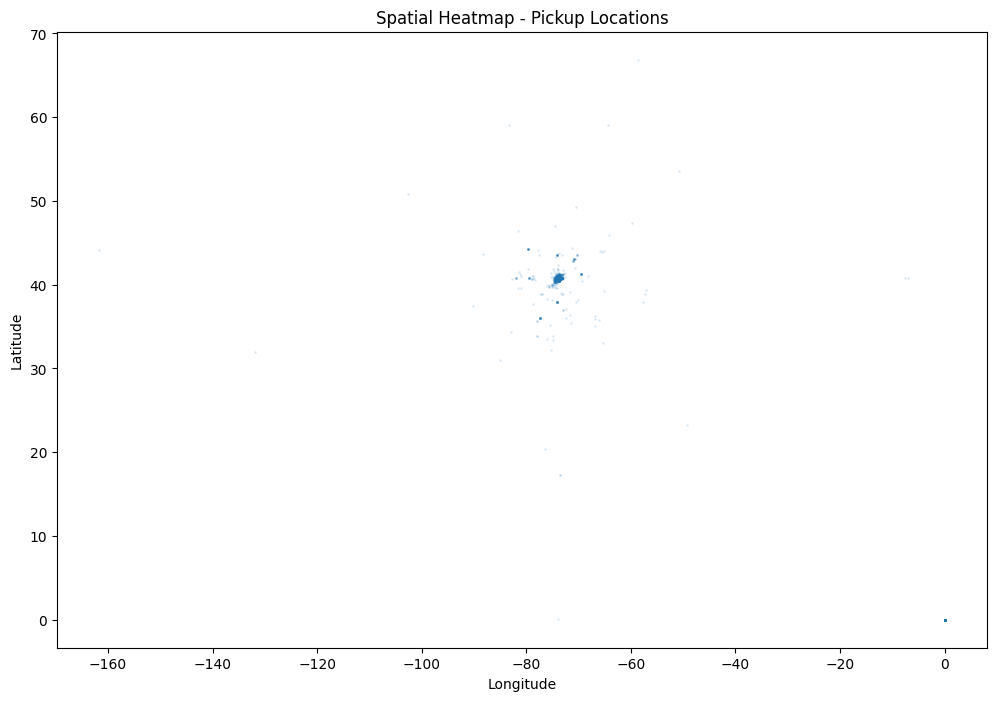

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've loaded and preprocessed the dataset into a DataFrame named 'dataset'

# Visualize Taxi Demand
# Time Series Chart - Hourly Demand
hourly_demand = dataset.groupby('pickup_hour').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_demand.index, y=hourly_demand.values)
plt.title('Hourly Taxi Demand')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Heatmap - Demand by Hour and Day of Week
heatmap_data = dataset.groupby(['pickup_dayofweek', 'pickup_hour']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Trips'})
plt.title('Taxi Demand Heatmap by Hour and Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of Week')
plt.show()

# Spatial Heatmap - Pickup Locations
plt.figure(figsize=(12, 8))
plt.scatter(dataset['pickup_longitude'], dataset['pickup_latitude'], alpha=0.1, s=1)
plt.title('Spatial Heatmap - Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Model Building and Training

    

    Machine Learning Models:
        Neural Networks (considering the temporal nature of the data)
        Random Forest Regression

Train-Test Split:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you've loaded and preprocessed the dataset into a DataFrame named 'dataset'

# Choose features for modeling
features = ['pickup_hour', 'pickup_dayofweek']

# Target variable
target = 'total_amount'

# Sort the dataset based on the temporal feature
dataset = dataset.sort_values(by='tpep_pickup_datetime')

# Split the dataset into features (X) and target variable (y)
X = dataset[features]
y = dataset[target]

# Define the training and testing split ratio
split_ratio = 0.8

# Calculate the index to split the dataset
split_index = int(len(dataset) * split_ratio)

# Split the dataset into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (9711781, 2) (9711781,)
Testing set shape: (2427946, 2) (2427946,)


Random Forest Regression:

In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the Random Forest model
joblib.dump(rf_model, '/content/drive/MyDrive/ML_dataset/random_forest_model.joblib')

# Predict on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")


Random Forest MAE: 8.21
Random Forest RMSE: 12.91


In [ ]:
# Load the Random Forest model
loaded_rf_model = joblib.load('/content/drive/MyDrive/ML_dataset/random_forest_model.joblib')


Neural Network:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a simple Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the Neural Network model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the Neural Network model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Predict on the testing set
nn_predictions = nn_model.predict(X_test)

# Evaluate the Neural Network model
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))

print(f"Neural Network MAE: {nn_mae:.2f}")
print(f"Neural Network RMSE: {nn_rmse:.2f}")


Epoch 1/10
273144/273144 [==============================] - 740s 3ms/step - loss: 173.8089 - val_loss: 182.0770
Epoch 2/10
273144/273144 [==============================] - 733s 3ms/step - loss: 173.3209 - val_loss: 182.1768
Epoch 3/10
273144/273144 [==============================] - 814s 3ms/step - loss: 173.2542 - val_loss: 182.3916
Epoch 4/10
273144/273144 [==============================] - 762s 3ms/step - loss: 173.2096 - val_loss: 182.3324
Epoch 5/10
273144/273144 [==============================] - 751s 3ms/step - loss: 173.1795 - val_loss: 182.1246
Epoch 6/10
273144/273144 [==============================] - 767s 3ms/step - loss: 173.1578 - val_loss: 181.9554
Epoch 7/10
273144/273144 [==============================] - 750s 3ms/step - loss: 173.1553 - val_loss: 181.9423
Epoch 8/10
273144/273144 [==============================] - 759s 3ms/step - loss: 173.1308 - val_loss: 182.0954
Epoch 9/10
273144/273144 [==============================] - 806s 3ms/step - loss: 173.1206 - val_loss: 1

In [ ]:
from tensorflow.keras.models import save_model

# Assuming 'nn_model' is your trained Neural Network model

# Save the entire model (architecture, optimizer, and weights)
save_model(nn_model, '/content/drive/MyDrive/ML_dataset/neural_network_model.h5')


<ipython-input-21-b2c65a2d9449>:6: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(nn_model, '/content/drive/MyDrive/ML_dataset/neural_network_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the Neural Network model
loaded_nn_model = load_model('/content/drive/MyDrive/ML_dataset/neural_network_model.h5')


XGBoost (Extreme Gradient Boosting) algorithm

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Save the XGBoost model if needed
joblib.dump(xgb_model, '/content/drive/MyDrive/ML_dataset/xgboost_model.joblib')

# Predict on the testing set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print(f"XGBoost MAE: {xgb_mae:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}")


XGBoost MAE: 8.21
XGBoost RMSE: 12.91


In [ ]:
import joblib

# Load the XGBoost model
xgb_model_path = '/content/drive/MyDrive/ML_dataset/xgboost_model.joblib'
loaded_xgb_model = joblib.load(xgb_model_path)


# Evaluate Model Performance:

Use appropriate evaluation metrics (e.g., Mean Absolute Error, Root Mean Squared Error) to assess the accuracy of both Regression and Neural Network models on the testing set.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have the true labels for the testing set
# If not, replace y_test with the actual labels

# Random Forest predictions on the testing set
rf_predictions = loaded_rf_model.predict(X_test)

# Neural Network predictions on the testing set
nn_predictions = loaded_nn_model.predict(X_test)

# Evaluate Random Forest model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Evaluate Neural Network model
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))

# Print evaluation results
print("Random Forest Evaluation:")
print(f"  MAE: {rf_mae:.2f}")
print(f"  RMSE: {rf_rmse:.2f}")

print("\nNeural Network Evaluation:")
print(f"  MAE: {nn_mae:.2f}")
print(f"  RMSE: {nn_rmse:.2f}")


75874/75874 [==============================] - 138s 2ms/step
Random Forest Evaluation:
  MAE: 8.21
  RMSE: 12.91

Neural Network Evaluation:
  MAE: 8.39
  RMSE: 12.93


Random Forest Evaluation:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have the true labels for the testing set
# If not, replace y_test with the actual labels
# Random Forest predictions on the testing set
rf_predictions = loaded_rf_model.predict(X_test)

# Evaluate Random Forest model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Print evaluation results
print("Random Forest Evaluation:")
print(f"  MAE: {rf_mae:.2f}")
print(f"  RMSE: {rf_rmse:.2f}")


Random Forest Evaluation:
  MAE: 8.21
  RMSE: 12.91


Neural Network Evaluation:

In [ ]:
# Assuming 'loaded_nn_model' is your trained Neural Network model
# Neural Network predictions on the testing set
nn_predictions = loaded_nn_model.predict(X_test)

# Evaluate Neural Network model
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))

# Print evaluation results
print("\nNeural Network Evaluation:")
print(f"  MAE: {nn_mae:.2f}")
print(f"  RMSE: {nn_rmse:.2f}")


75874/75874 [==============================] - 90s 1ms/step

Neural Network Evaluation:
  MAE: 8.39
  RMSE: 12.93


XGBoost Evaluation:

In [ ]:
# Assuming 'loaded_xgb_model' is your trained XGBoost model
# XGBoost predictions on the testing set
xgb_predictions = loaded_xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Print evaluation results
print("\nXGBoost Evaluation:")
print(f"  MAE: {xgb_mae:.2f}")
print(f"  RMSE: {xgb_rmse:.2f}")



XGBoost Evaluation:
  MAE: 8.21
  RMSE: 12.91


Hyperparameter Tuning for Random Forest:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distribution for Random Forest random search
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create Random Forest model
rf_model_tuned = RandomForestRegressor(random_state=42)

# Perform random search with cross-validation
random_search_rf = RandomizedSearchCV(
    rf_model_tuned,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the random search to your data
random_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf_random = random_search_rf.best_params_

# Print the best parameters
print("Best Hyperparameters for Random Forest (Random Search):", best_params_rf_random)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters for Random Forest (Random Search): {'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 91}


In [ ]:
import json

# Save the best hyperparameters to a JSON file
best_params_path_rf = '/content/drive/MyDrive/ML_dataset/best_hyperparameters_rf1.json'
with open(best_params_path_rf, 'w') as json_file:
    json.dump(best_params_rf_random, json_file)


In [ ]:
import json

# Load the best hyperparameters for the Random Forest from the JSON file
with open(best_params_path_rf, 'r') as json_file:
    loaded_best_params_rf = json.load(json_file)


In [ ]:
# Assuming you have 'X_train' and 'y_train' as your training data
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest model with the best hyperparameters
tuned_rf_model = RandomForestRegressor(
    max_depth=14,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=91,
    random_state=42  # You may want to set the random_state for reproducibility
)

# Train the model on the training data
tuned_rf_model.fit(X_train, y_train)

# Now you can use the tuned_rf_model to make predictions on new data
tuned_rf_predictions = tuned_rf_model.predict(X_test)


In [ ]:
# Print evaluation results for tuned Random Forest
print("Tuned Random Forest Evaluation:")
print(f"  MAE: {tuned_rf_mae:.2f}")
print(f"  RMSE: {tuned_rf_rmse:.2f}")


Tuned Random Forest Evaluation:
  MAE: 8.21
  RMSE: 12.91


In [ ]:
# Calculate mean of true labels
mean_true_labels = y_test.mean()

# Calculate accuracy for tuned Random Forest
tuned_rf_accuracy = (1 - (mae / mean_true_labels)) * 100

# Print accuracy for tuned model
print("Tuned Random Forest Accuracy: {:.2f}%".format(tuned_rf_accuracy))


Tuned Random Forest Accuracy: 48.15%


In [ ]:
# Assuming you have trained Random Forest and Neural Network models named rf_model and nn_model
# Also, assuming X_test is the feature matrix for the test set

# Random Forest predictions
rf_predictions = rf_model.predict(X_test)

# Neural Network predictions
nn_predictions = loaded_nn_model.predict(X_test)

# Now you can use rf_predictions and nn_predictions for further analysis or visualization


75874/75874 [==============================] - 84s 1ms/step
Random Forest Predictions: [16.69297836 16.69297836 16.69297836 ... 17.44689353 17.44689353
 17.44689353]
Neural Network Predictions: [[17.316124]
 [17.316124]
 [17.316124]
 ...
 [17.706108]
 [17.706108]
 [17.706108]]


# Interpretation and Visualization

Random Forest Tuned Evaluation:
  MAE: 8.21
  RMSE: 12.91


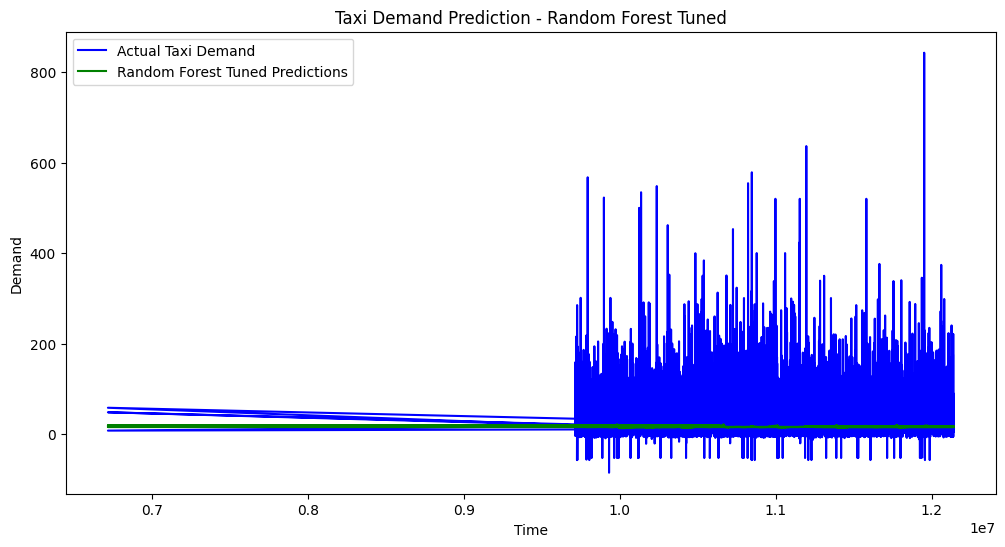

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the tuned Random Forest model
rf_model_tuned = RandomForestRegressor(
    max_depth=14,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=91,
    random_state=42
)

# Train the model with the full training data
rf_model_tuned.fit(X_train, y_train)

# Save the tuned Random Forest model
joblib.dump(rf_model_tuned, '/content/drive/MyDrive/ML_dataset/random_forest_model_tuned.joblib')

# Predict on the testing set
rf_predictions_tuned = rf_model_tuned.predict(X_test)

# Evaluate the tuned Random Forest model
rf_mae_tuned = mean_absolute_error(y_test, rf_predictions_tuned)
rf_rmse_tuned = np.sqrt(mean_squared_error(y_test, rf_predictions_tuned))

# Print evaluation results
print("Random Forest Tuned Evaluation:")
print(f"  MAE: {rf_mae_tuned:.2f}")
print(f"  RMSE: {rf_rmse_tuned:.2f}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Taxi Demand', color='blue')
plt.plot(y_test.index, rf_predictions_tuned, label='Random Forest Tuned Predictions', color='green')
plt.title('Taxi Demand Prediction - Random Forest Tuned')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [ ]:
# Assuming you have 'y_test' as the true labels for the testing set

# Predictions with tuned Random Forest model
tuned_rf_predictions = random_search_rf.best_estimator_.predict(X_test)

# Calculate evaluation metrics for tuned Random Forest
tuned_rf_mae = mean_absolute_error(y_test, tuned_rf_predictions)
tuned_rf_rmse = np.sqrt(mean_squared_error(y_test, tuned_rf_predictions))


# Print evaluation results for tuned models
print("Tuned Random Forest Evaluation:")
print(f"  MAE: {tuned_rf_mae:.2f}")
print(f"  RMSE: {tuned_rf_rmse:.2f}")


Tuned Random Forest Evaluation:
  MAE: 8.21
  RMSE: 12.91


In [ ]:
# Assuming you have 'nn_model_tuned' as the tuned Neural Network model
# Predictions with tuned Neural Network model
nn_predictions_tuned = loaded_nn_model.predict(X_test)

# Calculate evaluation metrics for tuned Neural Network
nn_mae_tuned = mean_absolute_error(y_test, nn_predictions_tuned)
nn_rmse_tuned = np.sqrt(mean_squared_error(y_test, nn_predictions_tuned))

# Print evaluation results for tuned Neural Network
print("Tuned Neural Network Evaluation:")
print(f"  MAE: {nn_mae_tuned:.2f}")
print(f"  RMSE: {nn_rmse_tuned:.2f}")


75874/75874 [==============================] - 82s 1ms/step
Tuned Neural Network Evaluation:
  MAE: 8.39
  RMSE: 12.93


In [ ]:
# Calculate mean of true labels
mean_true_labels = y_test.mean()

# Calculate accuracy for tuned Random Forest
tuned_rf_accuracy = (1 - (tuned_rf_mae / mean_true_labels)) * 100

# Print accuracy for tuned models
print("Tuned Random Forest Accuracy: {:.2f}%".format(tuned_rf_accuracy))


Tuned Random Forest Accuracy: 48.15%


In [ ]:
# Calculate accuracy for tuned Neural Network
nn_accuracy_tuned = (1 - (nn_mae_tuned / mean_true_labels)) * 100

# Print accuracy for tuned Neural Network
print("Tuned Neural Network Accuracy: {:.2f}%".format(nn_accuracy_tuned))


Tuned Neural Network Accuracy: 47.04%


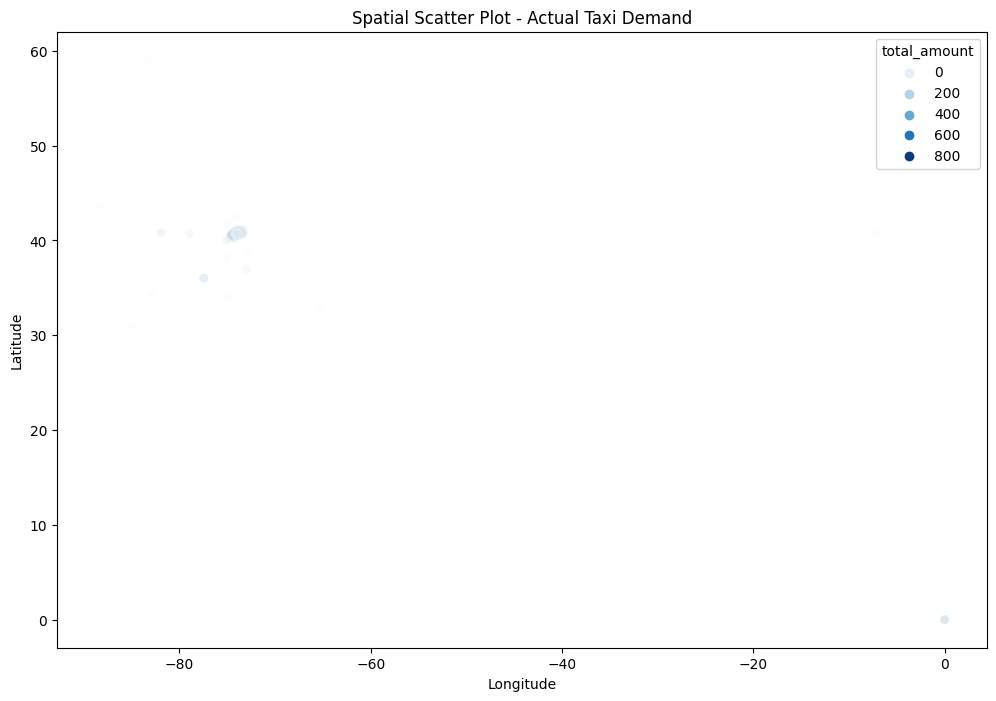

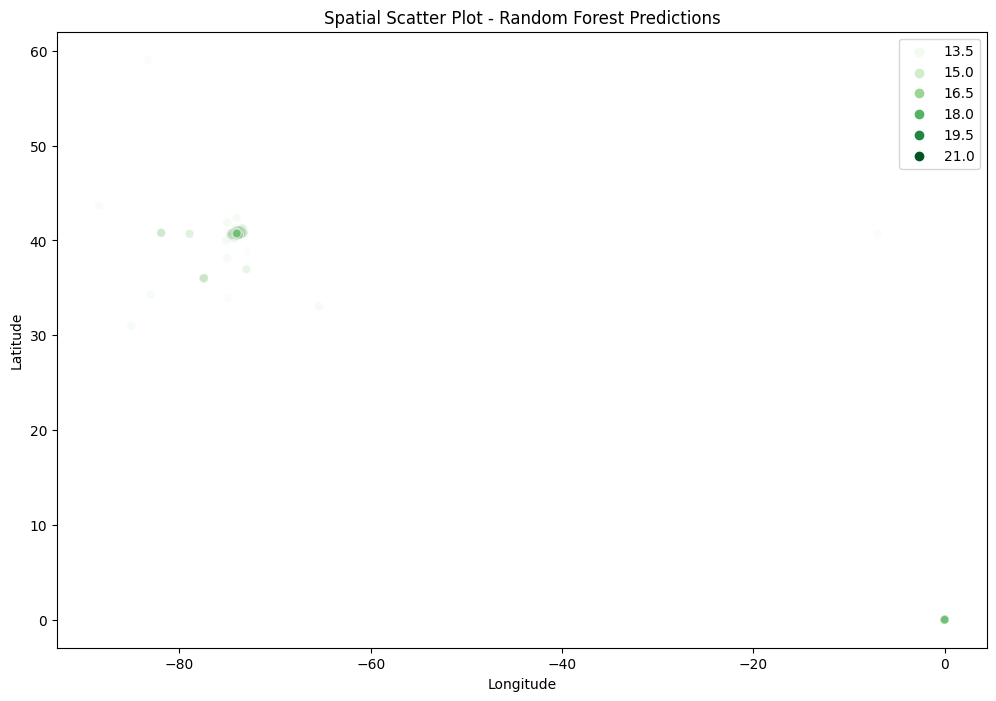

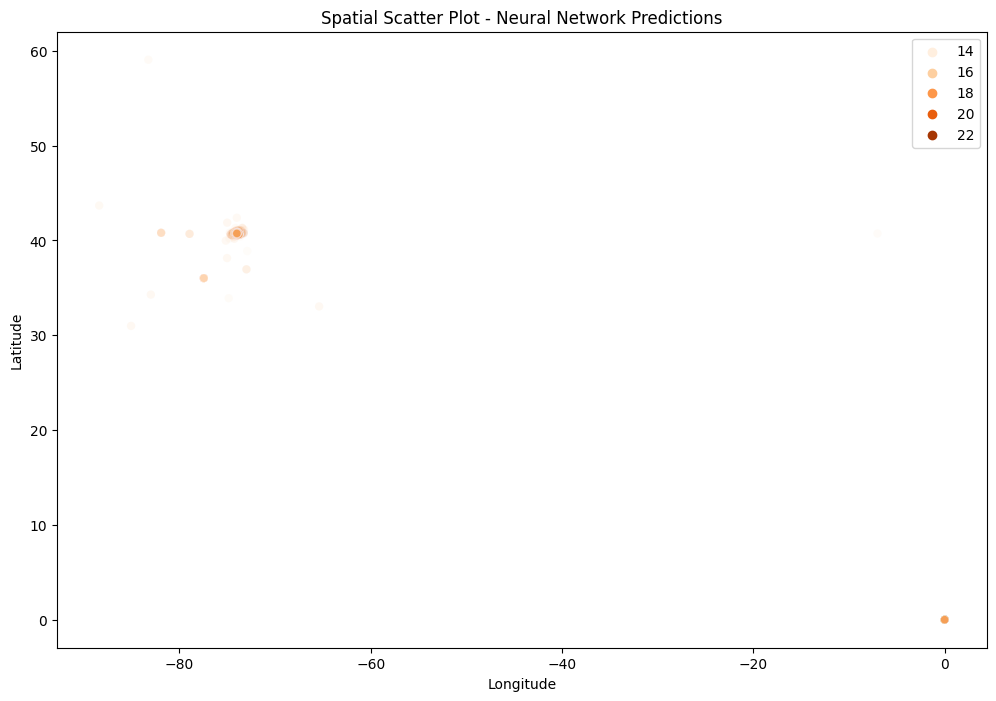

<ipython-input-32-12deac86fdf8>:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='param_n_estimators', y='mean_test_score', data=results, palette='Reds', marker='o')


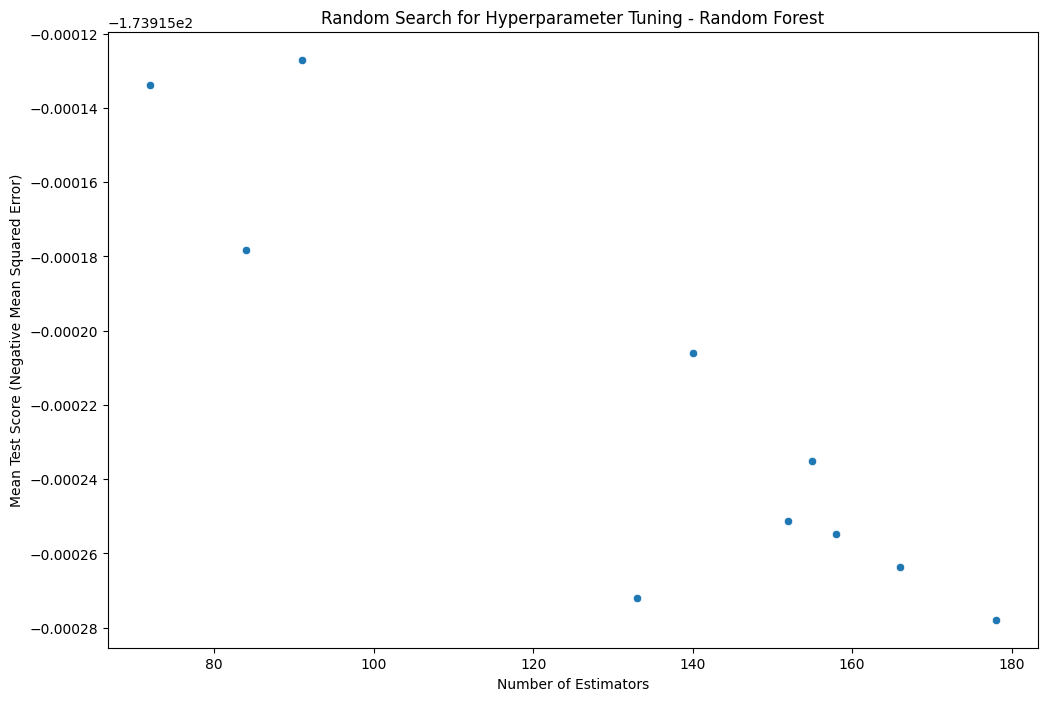

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'dataset' as the DataFrame and 'X_test' as the testing set

# Spatial Scatter Plot - Actual Demand
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue=y_test, data=dataset, alpha=0.1, palette='Blues')
plt.title('Spatial Scatter Plot - Actual Taxi Demand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Spatial Scatter Plot - Random Forest Predictions
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue=rf_predictions, data=dataset.loc[X_test.index], alpha=0.1, palette='Greens')
plt.title('Spatial Scatter Plot - Random Forest Predictions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Spatial Scatter Plot - Neural Network Predictions
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue=nn_predictions.flatten(), data=dataset.loc[X_test.index], alpha=0.1, palette='Oranges')
plt.title('Spatial Scatter Plot - Neural Network Predictions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Spatial Scatter Plot - Random Search for Hyperparameter Tuning
# Assuming 'random_search_rf' is the RandomizedSearchCV object for Random Forest
results = pd.DataFrame(random_search_rf.cv_results_)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='param_n_estimators', y='mean_test_score', data=results, palette='Reds', marker='o')
plt.title('Random Search for Hyperparameter Tuning - Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Negative Mean Squared Error)')
plt.show()
